<a href="https://colab.research.google.com/github/axelvargass/Actividad-4/blob/main/regresion_lineal_tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()
#Cargar desde un archivo .csv sin indice
df=pd.read_csv('microretailer_mit_lift_lab_actualizado.csv')


Saving microretailer_mit_lift_lab_actualizado.csv to microretailer_mit_lift_lab_actualizado.csv


In [ ]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
df["97_number_of_customers_in_store"]=df["97_number_of_customers_in_store"].fillna(method="bfill")

In [ ]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
df["268_number_fridges"]=df["268_number_fridges"].fillna(method="bfill")

In [ ]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
df["104_how_many_shelves_does_the_micro_retailer_have"]=df["104_how_many_shelves_does_the_micro_retailer_have"].fillna(method="bfill")

In [ ]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
df["2_current_permanent_employees"]=df["2_current_permanent_employees"].fillna(method="bfill")

In [ ]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
df["234_willingness_participate_workshop"]=df["234_willingness_participate_workshop"].fillna(method="bfill")

In [ ]:
#Sustituir valores nulos por valores no nulo hacia atras "forward fill"("ffill")
df["234_willingness_participate_workshop"]=df["234_willingness_participate_workshop"].fillna(method="ffill")

In [ ]:
#corroboramos valores nulos 
valores_nulos=df.isnull().sum()
valores_nulos

ya qye tenemos el archivo limopio ya podemos aplicar la regresion lineal 

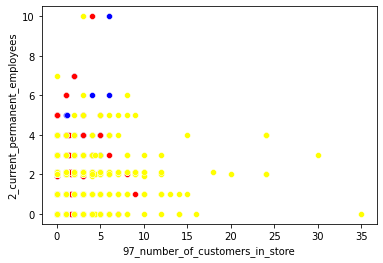

In [ ]:
#se grafican mapas de dispersion de las variables 3 variables 
from turtle import color
sns.scatterplot(x='97_number_of_customers_in_store', y='2_current_permanent_employees', color="blue" , data=df)
sns.scatterplot(x='268_number_fridges', y='2_current_permanent_employees', color="red" , data=df)
sns.scatterplot(x='104_how_many_shelves_does_the_micro_retailer_have', y='2_current_permanent_employees', color="yellow" , data=df)

In [ ]:
#declaramos las v ariables dependientes 
Vars_Indep=df[['97_number_of_customers_in_store', '268_number_fridges', '104_how_many_shelves_does_the_micro_retailer_have']]
Var_Dep=df['2_current_permanent_employees']

In [ ]:
#Se define como model como la funcion de regresion lineal 
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
#verificamos la funcion relacionada al modelo 
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#ajustamos el modelo con las variables antes declaradas 
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#verificamos los coeficientes obtenidos para el model ajustado 
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['97_number_of_customers_in_store', '268_number_fridges',
        '104_how_many_shelves_does_the_micro_retailer_have'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.17656949, -0.01013655, -0.00346191]),
 '_residues': 483.8308016544513,
 'rank_': 3,
 'singular_': array([88.68479734, 31.77712098, 22.5561918 ]),
 'intercept_': 1.7042744968282306}


y=0.17656949(97_number_of_customers_in_store)-0.01013655(268_number_fridges)-0.00346191(104_how_many_shelves_does_the_micro_retailer_have)+1.7042744968282306
> Bloc con sangría



In [ ]:
#Evaluamos el coeficiente del modelo obtenido por medio del coeficiente R2 determinación 
model.score(Vars_Indep,Var_Dep)

0.03574077077144189

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables
y_prend=model.predict(X=df[['97_number_of_customers_in_store', '268_number_fridges', '104_how_many_shelves_does_the_micro_retailer_have']])
y_prend

array([1.84004861, 2.05741347, 2.05741347, 1.88084398, 2.20332412,
       2.02650545, 1.67707758, 2.20678604, 2.71275949, 1.86007251,
       1.88084398, 1.85364707, 1.86724552, 1.69042685, 1.68375221,
       1.70081258, 2.00277044, 1.7042745 , 1.6802903 , 2.04727692,
       1.69042685, 1.85710898, 1.7042745 , 1.69735067, 1.69388876,
       2.20678604, 2.2203845 , 1.69388876, 1.86724552, 1.69067604,
       1.85112911, 2.03021655, 2.20678604, 2.0403531 , 1.98917198,
       1.69388876, 1.87045824, 1.87045824, 1.66728455, 1.79604051,
       1.64666794, 2.18651295, 2.03714038, 1.84968677, 1.68053949,
       2.22705913, 1.68696493, 2.02650545, 1.69067604, 1.70081258,
       1.84968677, 1.87392016, 1.83955022, 2.39027935, 1.99930853,
       1.68696493, 2.58366001, 1.87214978, 1.67707758, 1.69042685,
       1.68696493, 1.79554213, 2.05395156, 2.21667339, 1.69735067,
       2.0401039 , 1.69388876, 2.72585956, 1.68004111, 1.86353442,
       1.69388876, 1.67657919, 1.87070744, 2.39027935, 1.69388

In [ ]:
#insertamos la columna de predicciones del df
df.insert(0,'Predicciones',y_prend)
df

,Predicciones,Unnamed: 0,228_store_name,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,...,24_burnout,272_card_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency
0,1.840049,0,Mini súper 7 hermanos,Grocery store (aka. nanostore),no,yes,yes,"Security cameras,Smartphone",yes,yes,...,2.0,1,11.8,1.5,20.0,12.2,11.1,10.0,2,2.0
1,2.057413,1,Super papas Lulu,Grocery store (aka. nanostore),no,yes,yes,Smartphone,no,yes,...,3.9,1,11.8,1.5,11.8,12.2,11.1,9.4,2,2.7
2,2.057413,2,Arte Paquistán,Grocery store (aka. nanostore),no,yes,no,"Analog cash register,Smartphone",no,yes,...,3.9,1,11.8,1.5,11.8,12.2,11.1,9.4,2,2.7
3,1.880844,3,El vestir,Grocery store (aka. nanostore),no,yes,no,Smartphone,yes,yes,...,3.9,1,11.8,1.5,11.8,12.2,11.1,9.4,2,1.0
4,2.203324,4,Antojitos Tony,Micro-restaurant (aka. fondita),no,no,yes,"Security cameras,Smartphone",no,yes,...,3.9,1,11.8,1.5,11.8,12.2,11.1,9.4,2,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,1.669905,325,Xuti Galería,productos tradicionales,no,yes,no,Analog cash register,yes,yes,...,3.9,1,11.8,1.5,11.8,12.2,11.1,1.0,2,5.0
326,1.863534,326,July Store,Grocery store (aka. nanostore),yes,no,no,"Analog cash register,Smartphone",no,yes,...,3.9,1,11.8,1.5,11.8,12.2,11.1,9.4,2,2.7
327,2.220384,327,La fonda,Micro-restaurant (aka. fondita),yes,no,yes,Smartphone,no,yes,...,3.9,1,11.8,1.5,11.8,12.2,11.1,9.4,2,2.7
328,1.690676,328,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",Micro-restaurant (aka. fondita),no,no,yes,Analog cash register,no,yes,...,3.9,1,11.8,1.5,11.8,12.2,11.1,9.4,2,2.7


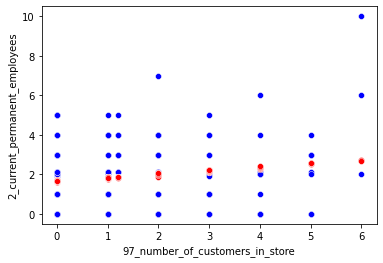

In [ ]:
#Comparamos entre total real y total predictivo
sns.scatterplot(x='97_number_of_customers_in_store', y='2_current_permanent_employees', color="blue" , data=df)
sns.scatterplot(x='97_number_of_customers_in_store', y='Predicciones', color="red" , data=df)

In [ ]:
#Corroboramos el coeficiente de determinacion de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.03574077077144189

In [ ]:
#Corroboramos el coeficiente de corelacion de nuestro modelo 
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.18905229639293433